In [3]:
from pyspark.sql import SparkSession

spark = SparkSession. \
    builder. \
    appName('my-demo-spark-job'). \
    getOrCreate()

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set("spark.databricks.delta.schema.autoMerge.enabled", "true")

df = spark.read.format("delta").load("/Users/bowles/stocks/delta6")

from deltahelper import get_delta_spark
from imports import *
from load_db import *
from backfill_morning import backfill_opentime #'ENPH', Date='2012-08-17'
df = get_date_ticker( '2017-01-20', 'AAL')

<AxesSubplot: xlabel='Datetime'>

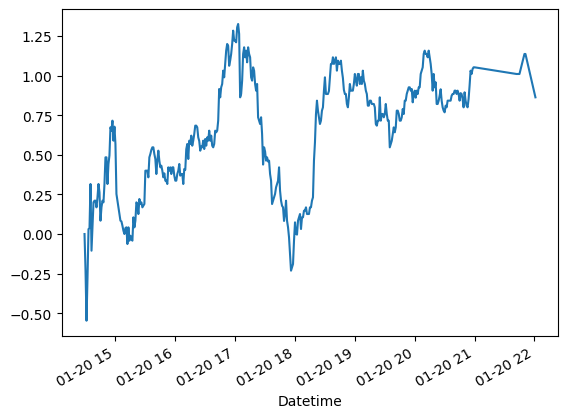

In [18]:
df['Close'].plot()

In [7]:
tickerdf = get_delta_spark().filter(f"ticker == 'QCOM'").select('*')
AAL already has 2013-12-11

In [4]:
import deltahelper2022-08-30 WMT
deltahelper.get_spark_delta().groupby("Date")

AttributeError: module 'deltahelper' has no attribute 'get_spark_delta'

In [3]:
22/12/22 15:37:32 WARN MergeIntoCommand: Merge source has SQLMetric(id: 545, name: Some(number of source rows), value: 13092) rows in initial scan but SQLMetric(id: 546, name: Some(number of source rows (during repeated scan)), value: 0) rows in second scan
Finished writing records
before 214 2013-12-24 AAL
after 214 2013-12-24 AAL
before 396 2013-12-26 AAL
after 568 2013-12-26 AAL
before 414 2013-12-27 AAL
after 631 2013-12-27 AAL
before 409 2013-12-30 AAL
after 577 2013-12-30 AAL
before 407 2013-12-31 AAL
after 1385 2013-12-31 AAL
before 400 2014-01-02 AAL
after 539 2014-01-02 AAL
before 411 2014-01-03 AAL
after 1365 2014-01-03 AAL
before 424 2014-01-06 AAL
after 689 2014-01-06 AAL
before 410 2014-01-07 AAL
after 1308 2014-01-07 AAL

Py4JJavaError: An error occurred while calling o35.load.
: java.lang.ClassNotFoundException: 
Failed to find data source: delta. Please find packages at
https://spark.apache.org/third-party-projects.html
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedToFindDataSourceError(QueryExecutionErrors.scala:587)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:675)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:725)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:207)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:185)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.ClassNotFoundException: delta.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:589)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:522)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:661)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:661)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:661)
	... 15 more


In [1]:
deltaTable

NameError: name 'deltaTable' is not defined

In [ ]:
def filter_good_hours(datedf):
    
    date = datedf['Date'].tolist()[0]
    day_dict = backfill_morning.get_days_dict()
    start_time = day_dict[date]
    
    datedf.sort_values(['Timestamp'], inplace=True)
    
    date_ok = True

    ingap = False
    for i, (ts, row) in enumerate(datedf.iterrows()):
        if i > 0:
            if (row['Timestamp'] > start_time) & (row['Timestamp'] < (start_time + (60 * 60 * 6.5))):
                
                gapmins = ((ts - last_ts ).seconds / 60)
                
                if gapmins > 1:
                    print(gapmins)
                    
                if ingap and gapmins> 6:
                    print(f"Found gap of 6 for {date}")
                    date_ok = False
                    break
                ingap=True
            else:
                ingap=False
            last_row, last_ts = row, ts
                                                     
    if len(open_close_datedf) < 372:
        date_ok = False
        
    datedf['quality_pass'] = date_ok
    return datedf